Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Libraries imported successfully!

📊 Dataset loaded successfully!
Shape of dataset: (301, 9)

First 5 rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


📝 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data colum

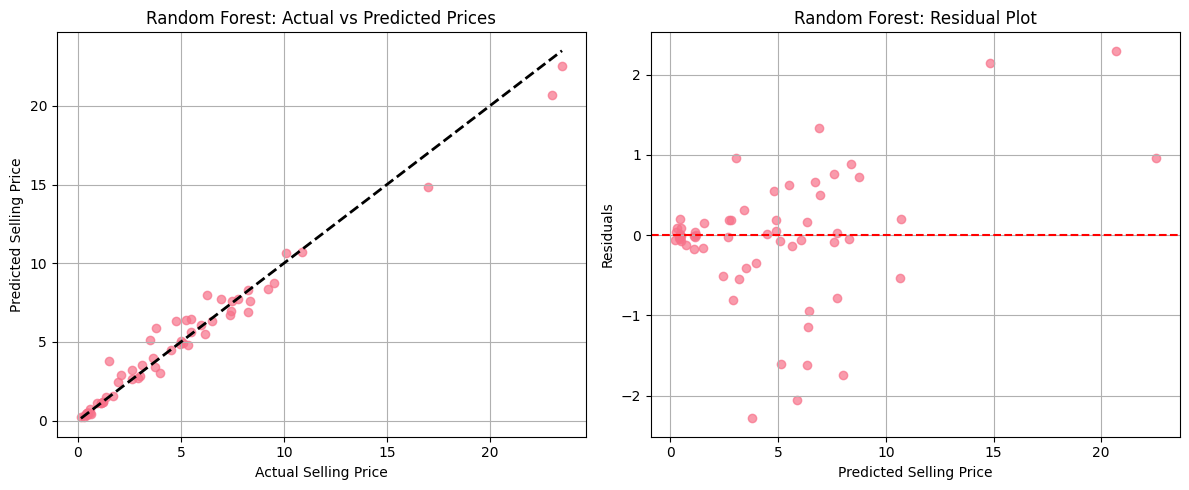

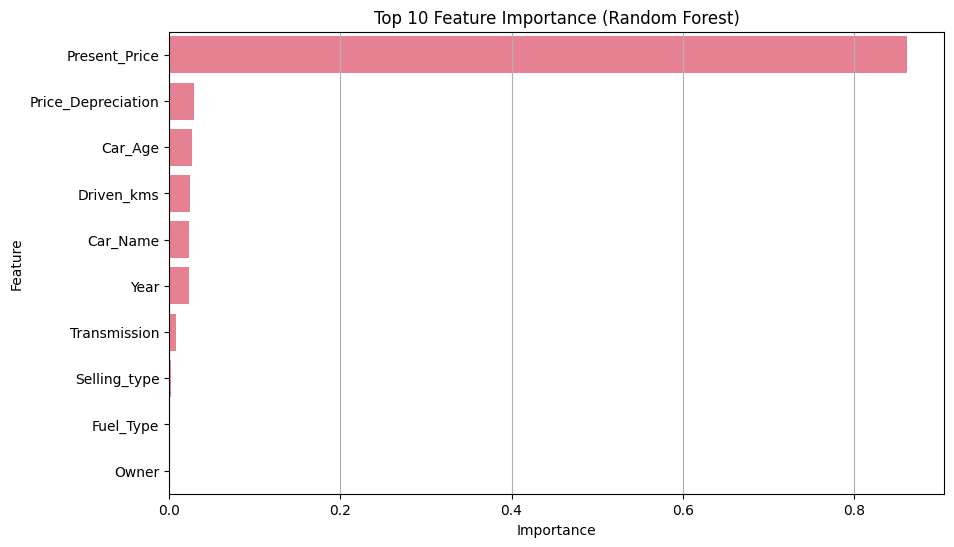

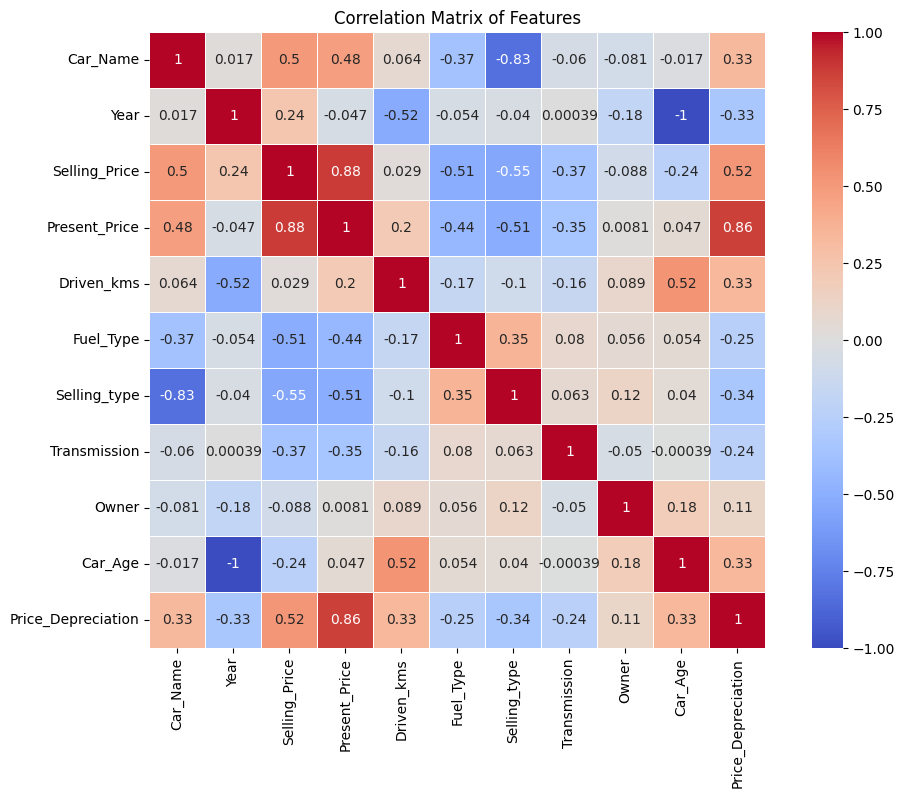



🔮 Example Prediction:
Predicted selling price for 2017 Ciaz: ₹6.86 Lakhs


🎉 Task completed successfully!
You now have a trained car price prediction model with evaluation metrics and visualizations.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
drive.mount("/content/drive")
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/My Drive/OIBSIP/car data.csv')

print("\n📊 Dataset loaded successfully!")
print(f"Shape of dataset: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\n\n📝 Dataset Information:")
df.info()

print("\n\n📈 Summary Statistics:")
print(df.describe(include='all').T)

# Check for missing values
print("\n\n🔍 Missing Values:")
print(df.isnull().sum())

# Data Preprocessing

label_encoders = {}
categorical_columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\n\n🔄 Categorical variables encoded successfully!")

# Calculate car age
current_year = 2025
df['Car_Age'] = current_year - df['Year']

df['Price_Depreciation'] = df['Present_Price'] - df['Selling_Price']

print("\n\n➕ New features created: Car_Age and Price_Depreciation")

X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

print(f"\n\n🎯 Features shape: {X.shape}")
print(f"🎯 Target shape: {y.shape}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n\n.Splitting completed:")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

#Random Forest Regressor
print("\n\n🚀 Training Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n\n📊 Random Forest Model Performance:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"Root Mean Squared Error: {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

#Linear Regression model
print("\n\n🚀 Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\n\n📊 Linear Regression Model Performance:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"Root Mean Squared Error: {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

# Feature Importance (for Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n\n⭐ Feature Importance (Random Forest):")
print(feature_importance)

# Visualizations

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.grid(True)

# Plot residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True, axis='x')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Simple prediction function
def predict_car_price(car_name, year, present_price, driven_kms, fuel_type, selling_type, transmission, owner):

    car_name_encoded = label_encoders['Car_Name'].transform([car_name])[0]
    fuel_type_encoded = label_encoders['Fuel_Type'].transform([fuel_type])[0]
    selling_type_encoded = label_encoders['Selling_type'].transform([selling_type])[0]
    transmission_encoded = label_encoders['Transmission'].transform([transmission])[0]

    car_age = current_year - year

    price_depreciation = present_price - 0

    features = np.array([[car_name_encoded, year, present_price, driven_kms,
                         fuel_type_encoded, selling_type_encoded, transmission_encoded,
                         owner, car_age, price_depreciation]])

    predicted_price = rf_model.predict(features)[0]

    return predicted_price

print("\n\n🔮 Example Prediction:")
example_car = predict_car_price(
    car_name="ciaz",
    year=2017,
    present_price=9.85,
    driven_kms=6900,
    fuel_type="Petrol",
    selling_type="Dealer",
    transmission="Manual",
    owner=0
)

print(f"Predicted selling price for 2017 Ciaz: ₹{example_car:.2f} Lakhs")

print("\n\n🎉 Task completed successfully!")
print("You now have a trained car price prediction model with evaluation metrics and visualizations.")